In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

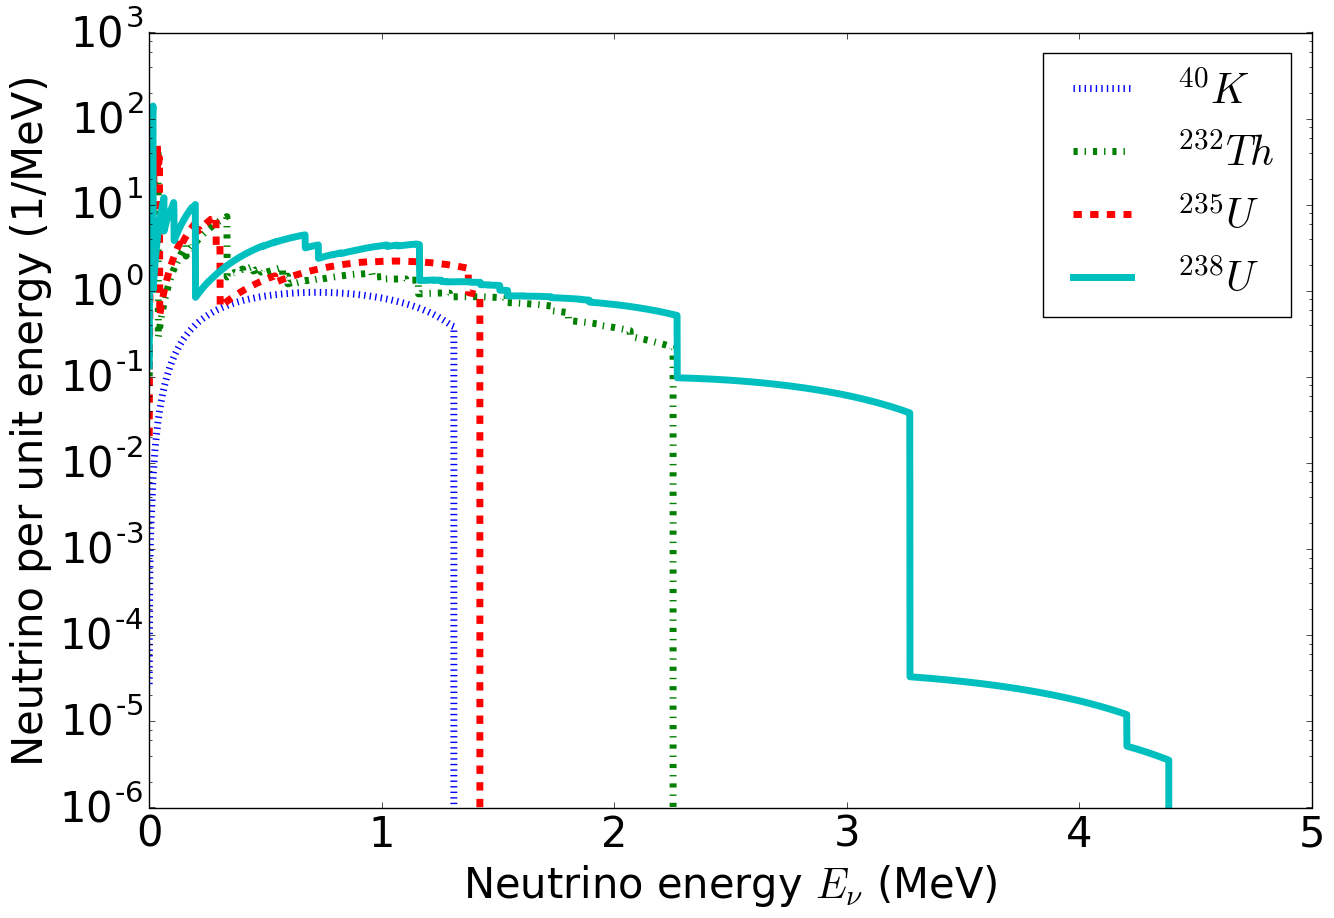

In [2]:
data40K=np.loadtxt('../AntineutrinoSpectrum_all/AntineutrinoSpectrum_40K.knt')
data232Th=np.loadtxt('../AntineutrinoSpectrum_all/AntineutrinoSpectrum_232Th.knt')
data235U=np.loadtxt('../AntineutrinoSpectrum_all/AntineutrinoSpectrum_235U.knt')
data238U=np.loadtxt('../AntineutrinoSpectrum_all/AntineutrinoSpectrum_238U.knt')

energy_spectra, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_yscale('log')
ax.plot(data40K[:,0]/1000, data40K[:,1]*1e3, label='$^{40}K$', ls=':', lw=5)
ax.plot(data232Th[:,0]/1000, data232Th[:,1]*1e3, label='$^{232}Th$', ls='-.' , lw=5)
ax.plot(data235U[:,0]/1000, data235U[:,1]*1e3, label='$^{235}U$', ls='--',  lw=5)
ax.plot(data238U[:,0]/1000, data238U[:,1]*1e3, label='$^{238}U$', lw=5)




ax.tick_params(axis='both', which='major', labelsize=30)

ax.set_xlabel('Neutrino energy $E_\\nu$ (MeV)', fontsize=30)
ax.set_ylabel('Neutrino per unit energy (1/MeV)', fontsize=30)

plt.legend(loc=0, fontsize=30)


plt.savefig('energy_spectrum.png')

In [3]:
#Let's try some Metropolis-Hastings
#First example with 238U spectrum.
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
def evaluate_spectrum(spectrum, x):
    index=find_nearest(spectrum[:,0]/1000, x)
    return spectrum[:,1][index]
def MH_Spectrum_Sampling(spectrum, niter=200000):
    markov_chain=[]
    max_interval=spectrum[:,0][spectrum[:,1]!=0.][-1]/1000
    initial_value=max_interval*np.random.random()
    markov_chain.append(initial_value)
    for i in range(niter):
        possible_jump=np.random.normal(markov_chain[i], 0.1)
        criteria = evaluate_spectrum(spectrum, possible_jump)/\
        evaluate_spectrum(spectrum, markov_chain[i])
        if(criteria>=1.):
            markov_chain.append(possible_jump)
        else:
            other_random = np.random.random()
            if(other_random<=criteria):
                markov_chain.append(possible_jump)
            else:
                markov_chain.append(markov_chain[i])
    return np.array(markov_chain)

In [10]:
half_life_times=np.array([14., 4.47, 0.76, 1.28])
print 14./half_life_times
print 3.9*232/238

[  1.           3.13199105  18.42105263  10.9375    ]
3.80168067227


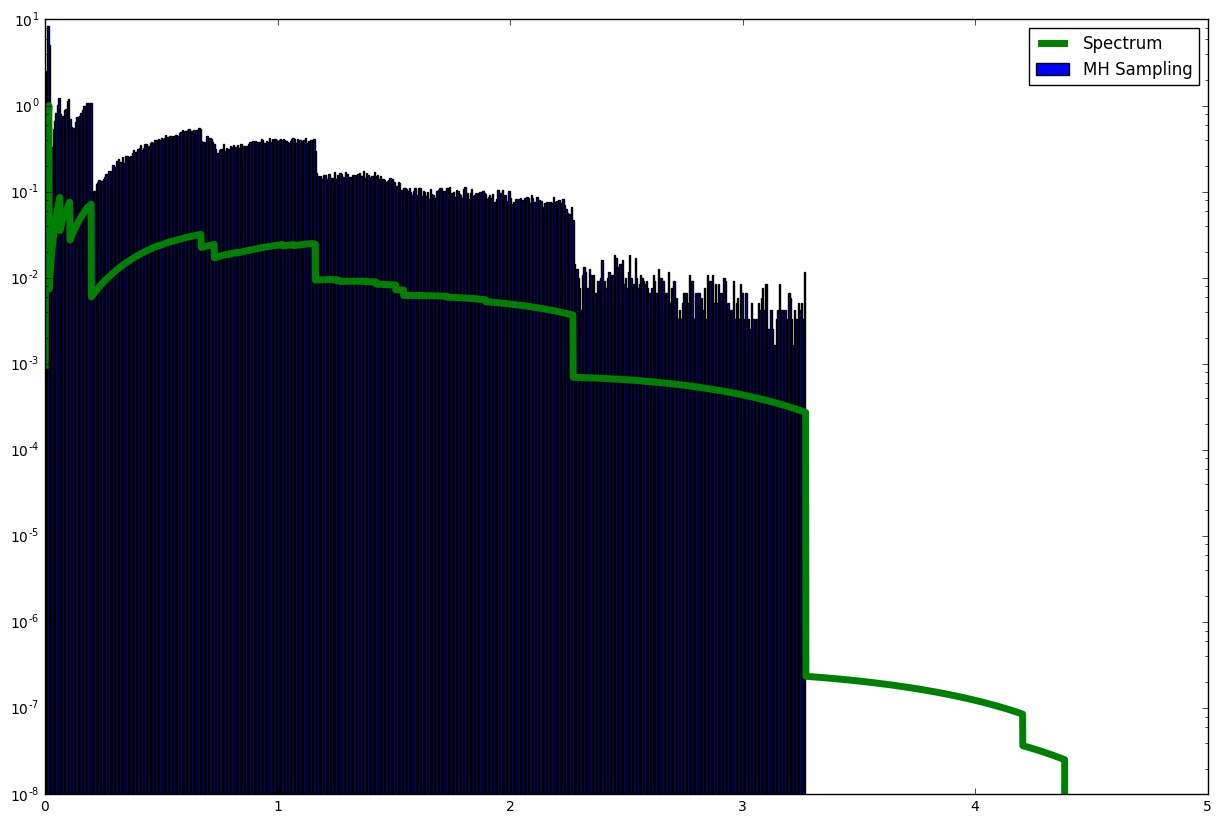

In [98]:
def plot_sampling_comparison(spectrum):
    energy_spectra_sample, ax = plt.subplots(1, 1, figsize=(15, 10))
    ax.hist(MH_Spectrum_Sampling(spectrum), bins=4000, normed=True, label='MH Sampling')
    ax.set_xlim(0, 5)
    ax.set_yscale('log')
    ax.plot(spectrum[:,0]/1000, spectrum[:,1]/max(spectrum[:,1]), label='Spectrum', ls='-', lw=5)
    plt.legend()
plot_sampling_comparison(data238U)

In [2]:
from sympy import *
init_session()
E_1, E_2, E_3, E_nu, A_pot, E_21, E_32 =symbols('E_1 E_2 E_3 E_nu A E_21 E_32')

IPython console for SymPy 1.0 (Python 2.7.12-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


Given the relations between energies:
$$E_{\nu}=\frac{E_1+E_2}{2}$$
$$E_{32}=E_3-E_2$$

$$E_{21}=E_2-E_1$$

We have the following system:

$$\hat{M}\vec{E}=\vec{P}$$
The solution to it is, obviously:
$$\vec{E}=\hat{M}^{-1}\vec{P}$$
Where:

In [3]:
E_vec=Matrix([E_1, E_2, E_3])
E_vec

⎡E₁⎤
⎢  ⎥
⎢E₂⎥
⎢  ⎥
⎣E₃⎦

In [4]:
M_mat=Matrix([[1, 1, 0], [0, -1, 1], [-1, 1, 0]])
M_mat

⎡1   1   0⎤
⎢         ⎥
⎢0   -1  1⎥
⎢         ⎥
⎣-1  1   0⎦

In [5]:
P_vec=Matrix([2*E_nu, E_32, E_21])
P_vec

⎡2⋅E_ν⎤
⎢     ⎥
⎢ E₃₂ ⎥
⎢     ⎥
⎣ E₂₁ ⎦

In [6]:
M_mat_inv=M_mat.inv()
M_mat_inv

⎡1/2  0  -1/2⎤
⎢            ⎥
⎢1/2  0  1/2 ⎥
⎢            ⎥
⎣1/2  1  1/2 ⎦

In [7]:
sum(M_mat_inv*P_vec)

The result for the trace of $H_m$ is then
$$\tr H_m=\frac{E_{21}}{2}+E_{32}+3E_{\nu}+A$$